# What we have seen

* Motivated the course by showcasing applications of choice modelling.
* Utility 'framework' for thinking about decision making. The idea rooted in economic theory and can serve as a guiding principle for:
  * Creating classes of models
  * Interpreting outcomes of the modelling
  * Specifying models to a particular dataset (which variables and transformations are needed).
* Multinomial logit: The 'workhorse' model, the most popular model class.
* Nested logit: An idea of extending the multinomial logit when there is prior information about the similarity of alternatives.
* Linked each of the models with a more abstract mathematical interpretation (the 'squashing', the 'grouping effect' in the nested logit). This is both more general (can be reused, build upon), it can be more intuitive and links choice modelling with disciplines such as Statistics and Machine Learning.

---
---


# What we will see

* Ordered Logit: When there is information about the relationshiop between alternatives.
* Panel data: Repeated observations from each individual and how to take benefit from them.
* *(Maybe)* Machine Learning approaches: How to specify models in a data-driven way.
* How to design surveys or experiments: Acquiring high quality data, a fundamental part of the scientific method.

---
---

# Ordered Logit

There is another type of discrete choice that appears in practice quite frequently, when the choice alternatives have some form of ordinal relationship. One example is satisfaction surveys:

Example 1:

**How satisfied are you in the unit QBUS9003840?**

1. Very dissatisfied
2. Dissatisfied
3. On par with other units
4. Satisfied
5. Very satisfied, would take it again.

Example 2:

**Please rate the movie in a scale of 1-10. 1 meaning the title was terrible and one of the worst titles you've seen and 10 meaning you think it was excellent.**

Example 3:

**How likely are you to change smartphone this year?**
1. Unlikely
2. Likely
3. Very likely

In all of these examples, individuals are making a choice, and it can be considered discrete (assume the rating of the movie can only be integers).
How can we model them, in order to understand what influences these choices?

We already have *most* of the tools required to create a model able to capture these choice problems.

---

---

# Reusing the toolbox that we already have: Multinomial logit

A simple solution to this problem is to understand these examples as just another choice problem, of the type we have already seen. If we do this, we would be **ignoring information about the relationship of the alternatives.**
For example, if we apply a multinomial logit to the thir example (likelihood of changing smartphone), we would be ignoring the fact that the 'unlikely' alternative is 'closer' to 'likely' than to 'very likely'. There is a clear ordinal relationship among alternatives.

---
---

# Reusing the toolbox that we already have: Nested logit

We have seen that the nested logit can be used when we have some prior information on some alternatives being more similar to others in the choice set.
If we go back to Example 1 (course satisfaction) we could consider 3 nests:
* Dissatisfied (the 'negative' nest containing alternatives 1 and 2)
* Neutral nest (with alternative 3).
* Satisfied (the 'positive' nest containing alternatives 4 and 5)


This way we are capturing some of the structure of the choice set, but still seems that we are missing something, we are losing some information, such as the Satisfied nest being more similar to the Neutral nest.

---
---



# Going back to the theory: Ordinal Logit

Fist of all, these simple solution might work well in practice, as we have seen with the Independence of Irrelevant Alternatives problem, we can argue that if we can specify a good model, already the multinomial logit can be enough.

Even when a problem seems to have a clear ordinal response, the actual dynamic in the data . For example, how people rate movies might vary a lot, even when using the same scale, and this can cause the relative ordering on the aggregate population to be very weak. This is a well known problem in psychology and many surveys take some time to 'educate' the subjects on what the scale means and how to assign values in that scale.

All that being said, **there is a simple way of capturing the ordinal relationship that becomes very clear if we go back to the utility interpretation of choice problems**.

---
---

# Ordinal Logit: Utility

Let's go back to Example 1, the course satisfaction survey.
If we go back to the utility interpretation that we used to derive the multinomial logit, we would be get

For an individual $i$ in the sample:
* $U_{i1}$ Utility that individual $i$ derives from choosing the Very dissatisfied alternative.
* $U_{i2}$ Utility that individual $i$ derives from choosing the Dissatisfied alternative.
* $U_{i3}$ Utility that individual $i$ derives from choosing the On par alternative.
* $U_{i4}$ Utility that individual $i$ derives from choosing the Satisfied alternative.
* $U_{i5}$ Utility that individual $i$ derives from choosing the Very Satisfied alternative.

The standard multinomial logit would model the problem as:
$$U_{ij} = \beta x_{ij} + \varepsilon_{ij}$$
With $i$ the individual, $j$ the alternative, $\beta$ the parameters of the model, $x_{ij}$ the vector of variables, already combining attributes and characteristics and $\varepsilon_{ij}$ the random component of the utility.

The interpretation is that the individual derives some benefit from choosing each alternative, and will go for the alternative that produces the maximum benefit.

The fundamental idea behind the ordered logit is uses utility but in a slightly different way, which might seem more natural:
The individuals receive some utility for having taken the course, and then they will answer the survey depending on 'how much' utility they receive. For example, if the utility is beyond some 'cutoff' level, they will choose 'Very satisfied'.

More formally, we can think modeling the utility of only one alternative:
$$ U_i = \beta x_i + \varepsilon_i$$
and then slicing the utility into sections:
* If $U_i < \tau_1$ then the individual will choose 'Very dissatisfied'
* If $\tau_1 < U_i < \tau_2$ then the individual will choose 'Dissatisfied'
* If $\tau_2 < U_i < \tau_3$ then the individual will choose 'On par'
* If $\tau_3 < U_i < \tau_4$ then the individual will choose 'Satisfied'
* If $\tau_4 < U_i $ then the individual will choose 'Very satisfied'

---
---

#Ordinal Logit: Implementation of the model

* In many ordinal situation we do not observe the utility directly, we only observed the 'categories' given in the survey.

* The random component of the utility will also induce some choice probabilities.

Consider the following graph (It is taken from Kenneth Train's book, Figure 7.1):




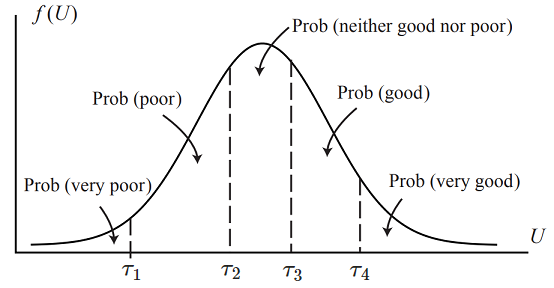

The ordinal logit formulation can be derived from the original 'vanilla' logit that considers only two alternatives. The idea is to model the logarithm of the odds as a linear model.

The linear relationship is imposed by taking the first section as reference (very poor in the plot), and then we model the odds vs. all other sections as binary logit model. This, we have the two alternatives, 'very poor' vs 'all other'. For modelling the rest of the sections, we add them one by one to the reference.

$$\log \left( \frac{P(\text{Very dissatisfied})}{ P(\text{Dissatisfied} | \text{On par} | \text{Satisfied} | \text{Very Satisfied})} \right )= \tau_1$$

$$\log \left( \frac{P(\text{Very dissatisfied} | \text{Dissatisfied})}{ P(  \text{On par} | \text{Satisfied} | \text{Very Satisfied})} \right )= \tau_2$$

$$\log \left( \frac{P(\text{Very dissatisfied} | \text{Dissatisfied} | \text{On par})}{ P(   \text{Satisfied} | \text{Very Satisfied})} \right )= \tau_3$$

$$\log \left( \frac{P(\text{Very dissatisfied} | \text{Dissatisfied} | \text{On par} | \text{Satisfied} )}{ P(   \text{Very Satisfied})} \right )= \tau_4$$

If we start from the bottom alternative, we get the following mathematical formulation:

$P(\text{Very dissatisfied})$ = P ($U_i < \tau_1$) = $$ \frac{e^{\tau_1 - \beta x_i}}{1 + e^{\tau_1 - \beta x_i}}$$

To derive the next section,
$P(\text{Dissatisfied})$, we can reason similary:

$P(\text{Very dissatisfied | Dissatisfied})$ = P ($U_i < \tau_2$) = $$ \frac{e^{\tau_2 - \beta x_i}}{1 + e^{\tau_2 - \beta x_i}}$$

For this aggregate probability, we can reach the probability from the section by simply:

$P(\text{Dissatisfied})$ = $P(\text{Very dissatisfied | Dissatisfied})$ - $P(\text{Very dissatisfied})$

The remaining probabilities are obtained in a similar fashion.

**When we estimate the ordinal logit, we estimate both the vector of coefficients $\beta$ and the vector of cutoff points $\tau$. The estimation method is maximum likelihood.**

---
---

# Intuition on the 'negative sign' in the derivation of the ordered logit

There was a great question in class about Why the negative sign in the exponetial, if the binary logit has positive?. Specifically:

While the logit is :
$$ \frac{e^{\beta x_i}}{1 + e^{\beta x_i}}$$

While the ordered logit is (for the reference alternative) :
$$ \frac{e^{\tau_1 - \beta x_i}}{1 + e^{\tau_1 - \beta x_i}}$$
So there is a negative sign in the $\beta$.


This is a great example of some 'arbitrary decisions' or conventions that are going under the hood. As it usually happens in choice models, comes from arbitrarily considering
a reference point and the direction of the utility. For example, if we flip the sign we get to this model:
$$ \frac{e^{\tau_1 + \beta x_i}}{1 + e^{\tau_1 + \beta x_i}}$$
This 'positive' model will produce **exactly the same choice probabilities when we fit it to data**, only that the $\beta$ that we estimate will have the opposite sign compared to the 'official' derivation!

The negative sign comes from naturally considering the cut-off points, the $\tau$s in the positive direction. We want, **arbitrarily**, to interpret larger values of utility as 'more positive' categorizations, for example: The 'Very sastified' category maps to larger underlying utility than 'Very dissatisfied'.
Going back to the plot, imagine that we are given $\tau_1$ and $\tau_2$, with $\tau_2$ greater than $\tau_1$. So $\tau_1$ and $\tau_2$ are fixed, and we only have to find the $\beta$ that is used to compute the observed utility.
The larger the observed utility, the more we tend towards the more positive categories. So when $\beta x_i$ grows, the choice probability for the bottom alternative, 'Very dissatisfied' decreases. That is why we get the negative sign, because arbitrarily want that the larger the utility, the **smaller** choice probability assigned to the reference.

In the binary logit, we were considering one utility per alernative. So we wanted the larger the observed utility, the **larger** choice prob assigned to the reference alternative, it seems natural.

In other words, the sign is arbitrary. We want to have an  interpretation of more observed utility, go for the 'better' alternative. So show how this is arbirary, we could have asked the question:

How **dissatisfied** are you in the unit QBUS9003840?

1. Very satisfied, would take it again.
2. Satisfied
3. On par with other units
4. Dissatisfied
5. Very dissatisfied

And when modelling the 'dissatisfaction' we would get the same model as the original, only that the sign of the coefficients are flipped.


# Numerical Ordering

Example 2 about movie ratings, the sections are actually numbers,
so all the sophistication of the ordinal logit could be reduced to just plain regression, if we ignore the part about discreteness.
However, see the 'complex' relationship  of the ratios en each bucket (integer rating). The distribtion is not 'unimodal' so simple regression models do not work well (or we can do better with the ordinal).

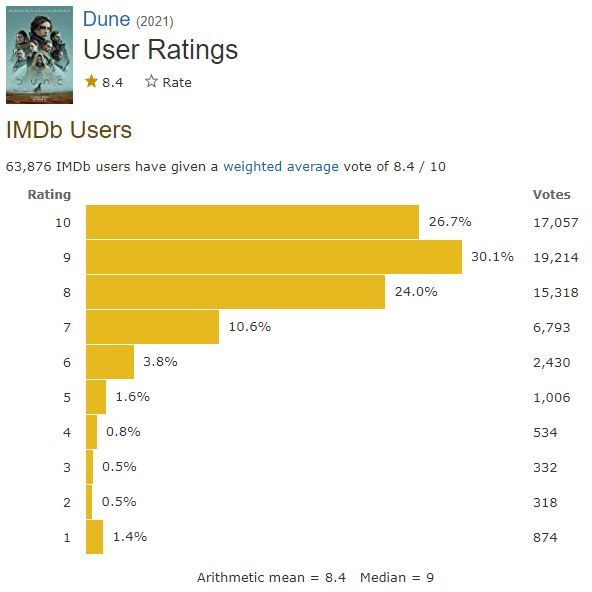

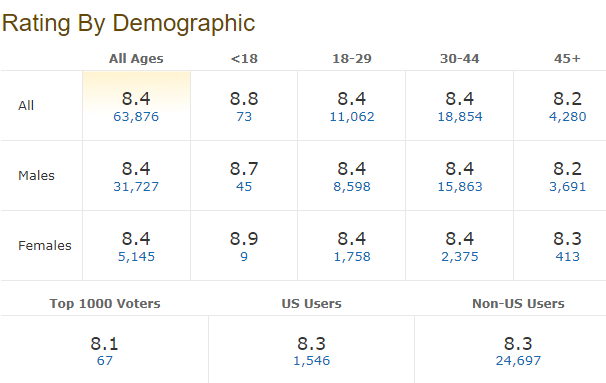

# Another example

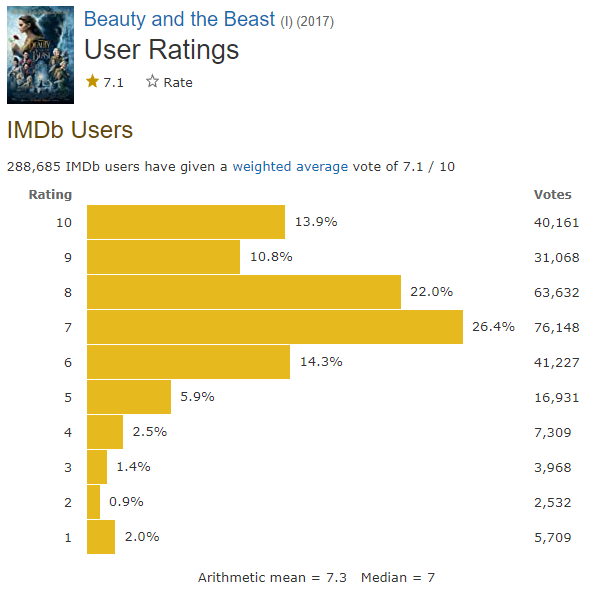

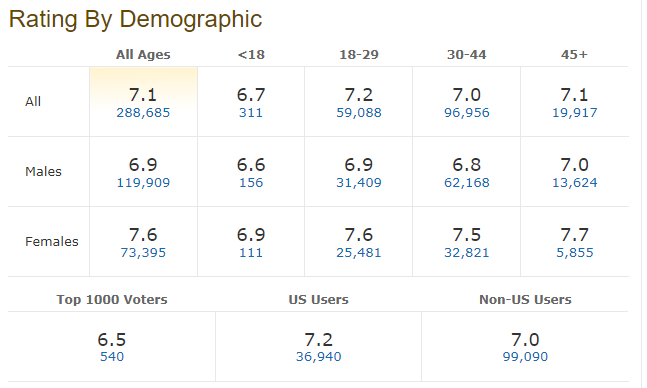

# Multiple ordered responses

Imagine that we have several questions in our survey, or we are rating several movies at the same time. How could we model this new problem?

* Each question its own model
* Either capturing differences by properly specifying an ordered logit (a variable that captures the difference among questions).
* Imposing similarity among the different questions (similar to the nested logit)
